# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


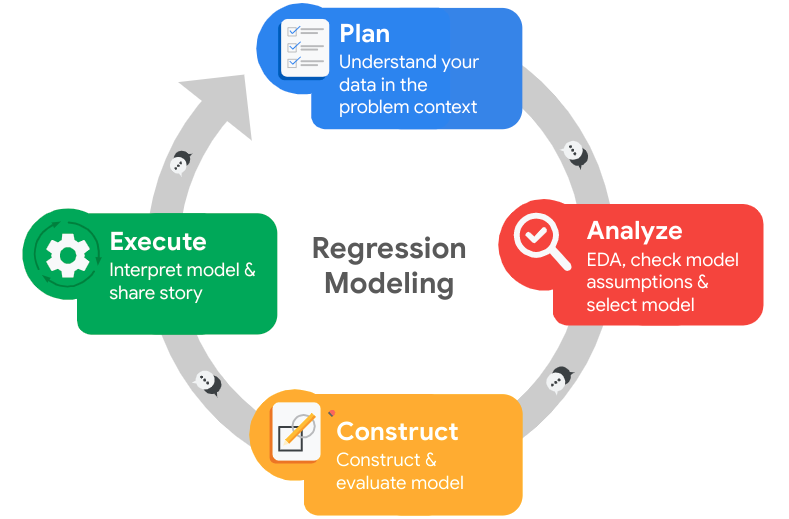

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders are the HR team at Salifort motors
2. The objective is to build a model that predicts whether an employee quits based on their data


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [45]:
#Import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#Import machine learning packages
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#Import model selection tools 
from sklearn.model_selection import GridSearchCV, train_test_split

#Import metrics 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Displaying all columns in a dataframe
pd.set_option('display.max_columns', None)

%matplotlib inline

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.rename(columns = {"average_montly_hours":"average_monthly_hours", "Work_accident":"work_accident", "Department":"department"}, inplace = True)

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicated_mask = df0.duplicated()

In [9]:
# Inspect some rows containing duplicates as needed
df0[duplicated_mask].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0[~duplicated_mask]

# Display first few rows of new dataframe as needed
df.head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

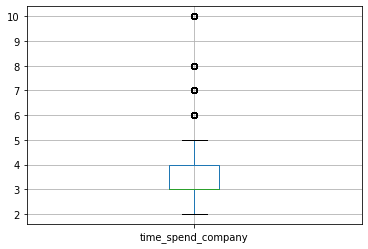

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
df.boxplot(column = "time_spend_company")

In [12]:
# Determine the number of rows containing outliers
IQR = df["time_spend_company"].quantile(q = [0.25, 0.75])
IQR_range = IQR[0.75]-IQR[0.25]
data_range = [IQR[0.25] - 1.5*IQR_range, IQR[0.75] + 1.5*IQR_range]
mask = (df["time_spend_company"] < data_range[0]) | (df["time_spend_company"] > data_range[1])
df[mask]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




After some preliminary analysis, it was determined that the only data column that contained outliers was the "time_spend_company" column. It seems that employee satisfaction might be related to retention. This is explored further below. 

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
retention_count = df.groupby("left")["left"].count()

# Get percentages of people who left vs. stayed
total = retention_count.sum()
retention_percentage = retention_count/total

retention_percentage


left
0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

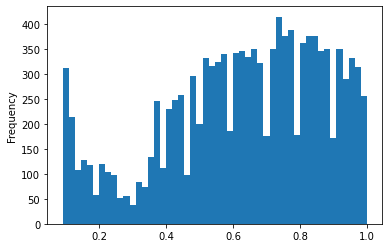

In [14]:
# Create a plot as needed
df["satisfaction_level"].plot.hist(bins = 50)

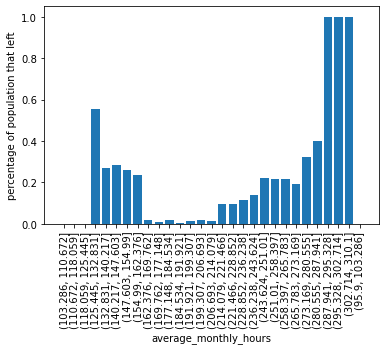

In [15]:
# Create a plot as needed
temp_data = df[["average_monthly_hours","left"]].sort_values(by = ["average_monthly_hours"])
minimum = temp_data["average_monthly_hours"].min()-0.1
maximum = temp_data["average_monthly_hours"].max()+0.1

bins = np.linspace(minimum, maximum, num = 30)
temp_data["binned"] = pd.cut(temp_data["average_monthly_hours"], bins).astype(str)
out = temp_data.groupby("binned")["left"].mean()

plt.bar(range(out.shape[0]), out.values)
plt.xticks(range(out.shape[0]), labels = out.index, rotation = 90) 
plt.xlabel("average_monthly_hours")
plt.ylabel("percentage of population that left")
plt.show()

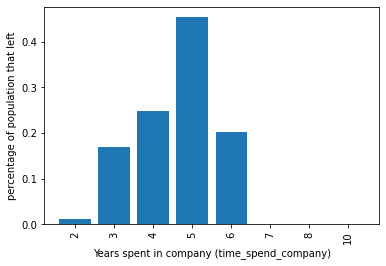

In [16]:
# Create a plot as needed
time_spent = df[["time_spend_company", "left"]]
time_spent = time_spent.groupby("time_spend_company").mean()
plt.bar(range(time_spent.shape[0]), time_spent["left"])
plt.xticks(range(time_spent.shape[0]), labels = time_spent.index, rotation = 90) 
plt.xlabel("Years spent in company (time_spend_company)")
plt.ylabel("percentage of population that left")
plt.show()

In [17]:
# Create a plot as needed
groups = df.groupby(["work_accident", "left"])["left"]
groups.count()

work_accident  left
0              0       8255
               1       1886
1              0       1745
               1        105
Name: left, dtype: int64

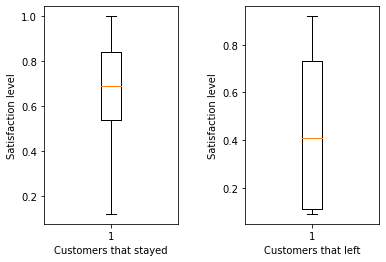

In [18]:
# Create a plot as needed
mask = (df["left"] == 0)
stayed = df[mask]
left = df[~mask]

fig, ax = plt.subplots(1,2)
ax[0].boxplot(stayed["satisfaction_level"])
ax[0].set_xlabel("Customers that stayed")
ax[0].set_ylabel("Satisfaction level")

ax[1].boxplot(left["satisfaction_level"])
ax[1].set_xlabel("Customers that left")
ax[1].set_ylabel("Satisfaction level")

plt.subplots_adjust(wspace = 0.5)
plt.show()

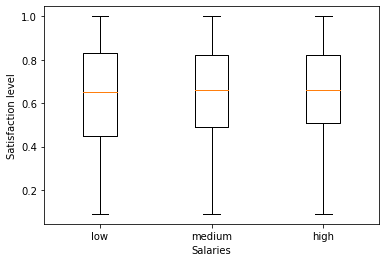

In [19]:
# Create a plot as needed
low_mask = (df["salary"] == "low")
medium_mask = (df["salary"] == "medium")
high_mask = (df["salary"] == "high")

low = df[low_mask]["satisfaction_level"]
medium = df[medium_mask]["satisfaction_level"]
high = df[high_mask]["satisfaction_level"]

data = [low, medium, high]
plt.boxplot(data, labels = ["low", "medium", "high"])
plt.xlabel("Salaries")
plt.ylabel("Satisfaction level")
plt.show()

Text(0, 0.5, 'Last evaluation')

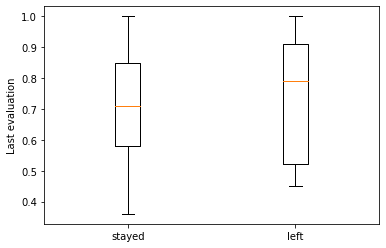

In [20]:
#plot as needed 
data = [stayed["last_evaluation"], left["last_evaluation"]]
plt.boxplot(data, labels = ["stayed", "left"])
plt.ylabel("Last evaluation")

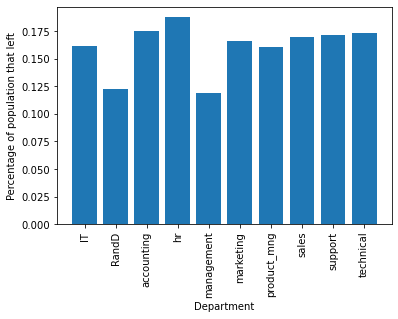

In [21]:
#plot as needed
department = df.groupby("department")["left"].mean()
plt.bar(range(department.shape[0]), department.values)
plt.xticks(range(department.shape[0]), labels = department.index, rotation = 90) 
plt.xlabel("Department")
plt.ylabel("Percentage of population that left")
plt.show()

### Insights

The following insights can be drawn from the visualizations above:

1. Most people are well-satisfied with the company as can be seen from the first graphic
2. The second graphics shows a very strong correlation between monthly hours worked and exployee retention. An employee working more than 280 hours a week is highly likely to leave. This suggests overworking is a strong cause of employee churn.
3. The thrid graphic shows that employee's that worked in the company for around 5 years are more likely to leave than ones that are more or less experienced. 
4. The fourth graphic shows that the employee's that left had a much lower average satisfaction (~0.4 vs ~0.7) than the ones that stayed.
5. The sixth graphic shows that the employee's that left had a higher previous evaluation score suggesting that they might have had an easier time finding another job.
6. The other two graphics show that the salary and department might not be relavant factors in employee churn.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



All of the variables in the model were chosen to be independent variables except for "left" after one-hot encoding them.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The task is classification. 

### Identify the types of models most appropriate for this task.

The most effective classification models are the random forest and boosted trees models 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
#One hot encode department and salary
X = pd.get_dummies(df, drop_first = True)
y = X["left"].copy()
X.drop(columns = ["left"], inplace = True)

In [23]:
#Divide data into train, validation, and split data
X_sum, X_test, y_sum, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Further divide data into validation and train data
X_train, X_val, y_train, y_val = train_test_split(X_sum, y_sum, test_size = 0.25, random_state = 1)

In [25]:
#Use GridSearchCV to find optimal hyperparameters for a random forest 
rf = RandomForestClassifier(random_state = 0)

#Define parameters to tune over
rf_params = {'max_depth': [2,3,4,5,8], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [4,7,10],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, rf_params, scoring=scoring, cv=5, refit='recall')

In [27]:
%%time

#Random Forest search
rf_cv.fit(X_train, y_train)

CPU times: user 16min 3s, sys: 2.75 s, total: 16min 5s
Wall time: 16min 5s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [28]:
#Use grid search to find optimal hyperparameters for Gradient Boosted Tree
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

xgb_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }    

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, xgb_params, scoring=scoring, cv=5, refit='recall')

In [30]:
%%time

#Gradient Boosted Tree search
xgb_cv.fit(X_train, y_train)

CPU times: user 18min 18s, sys: 6.92 s, total: 18min 25s
Wall time: 9min 16s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.

In [32]:
#Record recall scores of both models on trianing validation 
print("Random Forest best recall: ", rf_cv.best_score_)
print("Gradient Boosted Machine recall: ", xgb_cv.best_score_)

Random Forest best recall:  0.9119467496542185
Gradient Boosted Machine recall:  0.9202524204702627


In [33]:
#Validate both models on Validation data 
y_pred_rf = rf_cv.predict(X_val)
y_pred_xgb = xgb_cv.predict(X_val)

In [34]:
#Obtain scores from model validation
print("Accuracy of RF: ", accuracy_score(y_val, y_pred_rf))
print("Precision of RF: ", precision_score(y_val, y_pred_rf))
print("Recall of RF: ", recall_score(y_val, y_pred_rf))
print("f1 of RF: ", f1_score(y_val, y_pred_rf))
print("---------------------------------------------------------")
print("Accuracy of XGB: ", accuracy_score(y_val, y_pred_xgb))
print("Precision of XGB: ", precision_score(y_val, y_pred_xgb))
print("Recall of XGB: ", recall_score(y_val, y_pred_xgb))
print("f1 of XGB: ", f1_score(y_val, y_pred_xgb))

Accuracy of RF:  0.9849874895746455
Precision of RF:  0.9921465968586387
Recall of RF:  0.9199029126213593
f1 of RF:  0.9546599496221663
---------------------------------------------------------
Accuracy of XGB:  0.9841534612176814
Precision of XGB:  0.9794871794871794
Recall of XGB:  0.9271844660194175
f1 of XGB:  0.9526184538653367


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [40]:
#Evaluate model on test data
final_model = xgb_cv.best_estimator_
y_pred_test = final_model.predict(X_test)

In [43]:
#Summarize test scores in a data frame 
model_results = pd.DataFrame({"Model":"XGB", 
                              "Accuracy":accuracy_score(y_test, y_pred_test), 
                              "Precision":precision_score(y_test, y_pred_test),
                              "Recall":recall_score(y_test, y_pred_test),
                              "f1":f1_score(y_test, y_pred_test)}, index = [0])
model_results

,Model,Accuracy,Precision,Recall,f1
0,XGB,0.984994,0.969529,0.933333,0.951087


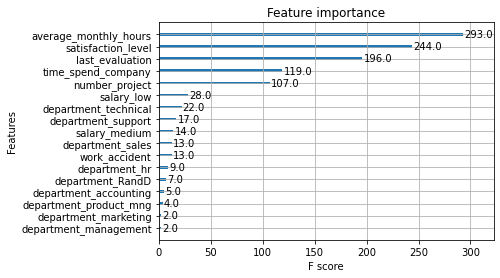

In [46]:
#Plot importance graph
plot_importance(final_model)

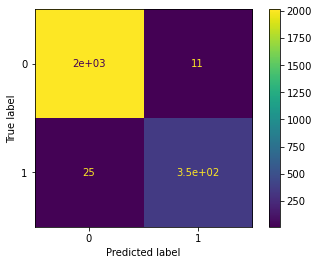

In [56]:
#Plot confusion matrix 
cm = confusion_matrix(y_test, y_pred_test, labels = final_model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = final_model.classes_)
disp.plot()
plt.show()

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



From the model importance chart, it can be seen that the most important variables that affect employee retention are:
1. average monthly hours worked by a employee - The higher the more likely the employee will leave (positively correlated)
2. Satisfaction level of employee - The lower the score, they more likely they are to leave (negatively correlated)
3. The last employee evaluation - The higher, the more likely they are to leave (positively correlated)

The business recomendation that I would suggest is to reduce employee workload. Aiming to decrease the number of hours an employee works monthly will reduce the chance of them leaving. 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




Summary of model results

The model performed oustandingly with an accuracy of 98%, precision of 97%, and a recall of 93%. This suggests that we can expect the model to predict around 93% of the people that leave correctly. In addition, out of the people that th emodel claims will leave, we can expect around 97% of them to leave in reality. 

Conclusion, Recommendations, Next Steps

The business recomendation that I would suggest is to reduce employee workload. Aiming to decrease the number of hours an employee works monthly will reduce the chance of them leaving. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.